##1. Defining the Question 

###a) Specifying the Question


Mchezopesa Ltd which is a football company wishes to accomplish some task and I have been hired as a football analyst to do some prediction analysis between two teams based on who is home and who's away. I will have to make my analysis predictions based on whether the tournament was friendly or not. We are also to do some predictions of future goals with the the hometeam and away team scores. 

###Import the Libraries 

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

###Load Datasets 

##We load the Fifa Dataset and We clean it

In [6]:
# We load the fifa ranking data first 
#
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
fifa = pd.read_csv('/content/fifa_ranking.csv', parse_dates=['rank_date'], date_parser=d_parser)

# previewing the first 5 rows of our dataset
fifa.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [7]:
#previewing the last 4 rows of our dataset
fifa.tail(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

##DATA PREPROCESSING

##1. Data Cleaning

Clean the Fifa Dataset

In [9]:
# Checking for null values 
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [10]:
#Filling null values with zeros
fifa.fillna(0,inplace =True)

In [11]:
fifa.duplicated().sum()

37

We have 37 duplicates hence we need to drop them 

In [12]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [13]:
data = fifa.drop_duplicates()
data

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [14]:
# We run our data set again to check if we have any duplicates left 
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 12  three_year_ago_avg       57756 n

In [16]:
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [17]:
data.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


Our Fifa dataset is now clean




We now load and clean the Result dataset




##We load the Results Dataset

In [18]:
# We load the result data now 
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
results = pd.read_csv('/content/results.csv', parse_dates=['date'], date_parser=d_parser)

#previewing the first 3 rows of our dataset
results.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [19]:
#previewing the last 3 rows of our dataset
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


We clean the Results dataset

In [20]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [21]:
#Filling null values with zeros
results.fillna(0,inplace =True)

In [22]:
results.duplicated().sum()

0

In [23]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

##Checking the Data

In [24]:
# We reload the fifa datasets again 
# We name the dataset data
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('/content/fifa_ranking.csv', parse_dates=['rank_date'], date_parser=d_parser)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data['year'] = data.rank_date.dt.year

data['month'] = data.rank_date.dt.month

In [26]:
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [27]:
data['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [28]:
# First we load  the results datasets again 
# We name it data1
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data1 = pd.read_csv('/content/results.csv', parse_dates=['date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data1['year'] = data.rank_date.dt.year

data1['month'] = data.rank_date.dt.month

In [30]:
data1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1993,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1993,8
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1993,8
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1993,8


In [31]:
data1['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [32]:
# we check if the coulmns have the appropriate datatype

data.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
month                               int64
dtype: object

In [33]:
data1.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month                  int64
dtype: object

In [34]:
# We drop all the columns that we do not need on both the results and fifa datasets
# We drop this columns because they will not be used in the analysis of our dataset 
# 'rank_date', 'country_abrv','cur_year_avg', 'cur_year_avg_weighted','last_year_avg', 'last_year_avg_weighted', 
# 'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'
#
#
data.drop(['rank_date','country_abrv', 'cur_year_avg', 'cur_year_avg_weighted', 'total_points', 'previous_points', 'confederation','last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted'],axis=1,inplace=True)

In [35]:
data.head()

,rank,country_full,rank_change,year,month
0,1,Germany,0,1993,8
1,2,Italy,0,1993,8
2,3,Switzerland,9,1993,8
3,4,Sweden,0,1993,8
4,5,Argentina,5,1993,8


In [36]:
# We reload our dataset to reconfirm that the columns we wabted droped have been dropped 
data.columns

Index(['rank', 'country_full', 'rank_change', 'year', 'month'], dtype='object')

In [37]:
# We drop the 'City' and 'date' column in the result dataset
#
data1.drop(['city', 'date'],axis=1,inplace=True)

In [38]:
data1.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,Scotland,England,0,0,Friendly,Scotland,False,1993,8
1,England,Scotland,4,2,Friendly,England,False,1993,8
2,Scotland,England,2,1,Friendly,Scotland,False,1993,8
3,England,Scotland,2,2,Friendly,England,False,1993,8
4,Scotland,England,3,0,Friendly,Scotland,False,1993,8


In [39]:
data.head()

,rank,country_full,rank_change,year,month
0,1,Germany,0,1993,8
1,2,Italy,0,1993,8
2,3,Switzerland,9,1993,8
3,4,Sweden,0,1993,8
4,5,Argentina,5,1993,8


###MERGING THE DATASETS

In [40]:
# We create the home data set we name it home_df
home_df = pd.merge(data, data1, how = 'inner', left_on = ['year','month','country_full'], right_on = ['year','month','home_team'])

In [41]:
home_df.rename(columns={'rank':'home_rank','country_full':'home_country'}, inplace = True)

In [42]:
home_df

,home_rank,home_country,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,5,Argentina,5,1993,8,Argentina,Uruguay,2,3,Friendly,Argentina,False
1,11,England,-6,1993,8,England,Scotland,4,2,Friendly,England,False
2,11,England,-6,1993,8,England,Scotland,2,2,Friendly,England,False
3,11,England,-6,1993,8,England,Scotland,1,3,Friendly,England,False
4,11,England,-6,1993,8,England,Wales,2,1,Friendly,England,False
...,...,...,...,...,...,...,...,...,...,...,...,...
36449,203,American Samoa,0,2011,10,American Samoa,Tuvalu,1,1,Pacific Games,Samoa,True
36450,203,American Samoa,0,2011,10,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True
36451,203,Samoa,0,2011,10,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
36452,203,Samoa,0,2011,10,Samoa,Tonga,2,0,Pacific Games,Samoa,False


In [43]:
# We create the away team data set we name it away_df
away_df = pd.merge(data, data1, how = 'inner', left_on = ['year','month','country_full'], right_on = ['year','month','home_team'])

In [44]:
away_df.rename(columns={'rank' : 'away_rank', 'county_full' : 'away_country'},inplace=True)

In [45]:
away_df

,away_rank,country_full,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,5,Argentina,5,1993,8,Argentina,Uruguay,2,3,Friendly,Argentina,False
1,11,England,-6,1993,8,England,Scotland,4,2,Friendly,England,False
2,11,England,-6,1993,8,England,Scotland,2,2,Friendly,England,False
3,11,England,-6,1993,8,England,Scotland,1,3,Friendly,England,False
4,11,England,-6,1993,8,England,Wales,2,1,Friendly,England,False
...,...,...,...,...,...,...,...,...,...,...,...,...
36449,203,American Samoa,0,2011,10,American Samoa,Tuvalu,1,1,Pacific Games,Samoa,True
36450,203,American Samoa,0,2011,10,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True
36451,203,Samoa,0,2011,10,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
36452,203,Samoa,0,2011,10,Samoa,Tonga,2,0,Pacific Games,Samoa,False


In [46]:
# We merge the two datasets home_df and away_df and name it fifa results
fifa_results = pd.merge(home_df,away_df, how='inner', left_on=['year','month','away_team','home_score','away_score','home_team','tournament','country','neutral', 'rank_change'],right_on=['year','month','away_team','home_score','away_score','home_team','tournament', 'country','neutral', 'rank_change'])

In [47]:
# We run the new dataset 
fifa_results.head(2)

,home_rank,home_country,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral,away_rank,country_full
0,5,Argentina,5,1993,8,Argentina,Uruguay,2,3,Friendly,Argentina,False,5,Argentina
1,11,England,-6,1993,8,England,Scotland,4,2,Friendly,England,False,11,England


In [48]:
# We run our data set again to check if we have any duplicates left 
fifa_results.duplicated().sum()

620

In [49]:
# We drop the duplicates 
fifa_results = fifa_results.drop_duplicates()
fifa_results

,home_rank,home_country,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral,away_rank,country_full
0,5,Argentina,5,1993,8,Argentina,Uruguay,2,3,Friendly,Argentina,False,5,Argentina
1,11,England,-6,1993,8,England,Scotland,4,2,Friendly,England,False,11,England
2,11,England,-6,1993,8,England,Scotland,2,2,Friendly,England,False,11,England
3,11,England,-6,1993,8,England,Scotland,1,3,Friendly,England,False,11,England
4,11,England,-6,1993,8,England,Wales,2,1,Friendly,England,False,11,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,203,American Samoa,0,2011,10,American Samoa,Tuvalu,1,1,Pacific Games,Samoa,True,203,American Samoa
36922,203,American Samoa,0,2011,10,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True,203,American Samoa
36923,203,Samoa,0,2011,10,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False,203,Samoa
36924,203,Samoa,0,2011,10,Samoa,Tonga,2,0,Pacific Games,Samoa,False,203,Samoa


In [50]:
fifa_results.columns

Index(['home_rank', 'home_country', 'rank_change', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'away_rank', 'country_full'],
      dtype='object')

In [51]:
fifa_results.shape

(36306, 14)

## EXPLORATORY DATA ANALYSIS 

###Univariate Analysis

####a) Categorical and Categorical



Frequency table

In [52]:
fifa_results.head(2)

,home_rank,home_country,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral,away_rank,country_full
0,5,Argentina,5,1993,8,Argentina,Uruguay,2,3,Friendly,Argentina,False,5,Argentina
1,11,England,-6,1993,8,England,Scotland,4,2,Friendly,England,False,11,England


In [53]:
#Frequency table for country_full_x and away_team

fifa_results.neutral.value_counts()

False    27803
True      8503
Name: neutral, dtype: int64

In [54]:
fifa_results.tournament.value_counts()

Friendly                                15158
FIFA World Cup qualification             6588
UEFA Euro qualification                  2413
African Cup of Nations qualification     1499
FIFA World Cup                            833
                                        ...  
NAFU Championship                           3
SKN Football Festival                       3
Copa América qualification                  2
ELF Cup                                     1
AFF Championship qualification              1
Name: tournament, Length: 102, dtype: int64

Bars and Histograms

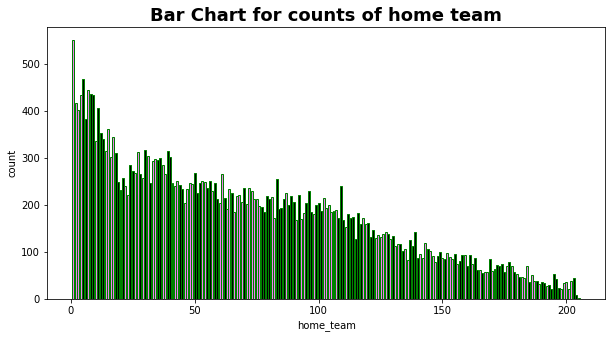

In [66]:
#Histogram for Tournament
home_team = fifa_results.home_rank.value_counts().reset_index(name='counts')
x= home_team_count['index']
y = home_team_count['count']
plt.figure(figsize=(10,5))
plt.bar(x,y , color=('violet','black'),edgecolor='green')
plt.xlabel('home_team')
plt.ylabel('count')
plt.title('Bar Chart for counts of home team',fontsize = 18,fontweight ='bold')
plt.show()

###POLYNOMINAL REGRESSION

###Model 1: Predicting Home Score


###Detecting multicollinearity

In [ ]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = fifa_results.drop(columns=['rank_change', 'year',	'month','neutral','away_rank'])


# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

In [ ]:
# Displaying our vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

###Import Libraries

In [ ]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
fifa_results.head(2)

Analysis of the data

In [ ]:
fifa_results.columns

In [ ]:
# We define both our x and y axis 
x= fifa_results[['home_rank','away_rank','away_score']]
y= fifa_results['home_score'].values

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

In [ ]:
y_pred = pol_reg.predict(x_test)

In [ ]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

####KFold cross Validation

In [ ]:
# We define both our x and y axis 
x= fifa_results[['home_rank','away_rank','home_score']]
y= fifa_results['away_score'].values

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

In [ ]:
y_pred = pol_reg.predict(x_test)

In [ ]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Running the code above should yield an RMSE of ~ 1.348695.

###Kfold Cross Validation 

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variabes for this 
x = fifa_results[['home_rank', 'away_rank', 'away_score']].values
y = fifa_results['home_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

We can see the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models.

In [ ]:
# We compute the average by creating array RMSES to gather all the RMSE values 

np.mean(RMSES)

We can see the average(1.69890) is fairly close to our initial value (1.348695).

###Bartlett's Test

Finding Residuals

In [ ]:
# We create the residual by subtracting the test value from the predicted value in our dataset 

residuals = np.subtract(y_pred, y_test)

# We then describe our residual
pd.DataFrame(residuals).describe()

In [ ]:
residuals.mean()

In [ ]:
import scipy as sp

test_results, p_value = sp.stats.bartlett(y_pred, residuals)
test_results, p_value

In [ ]:
# We compute the  critical value of the chi squared to interpret the results
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

In [ ]:
if (test_results > critical_value):
  print('the variance are  unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

###Model 2: Predicting Away Score

In [ ]:
independent_only = fifa_results[['home_rank', 'away_rank', 'home_score']]

In [ ]:
#  we display the correlation between the variables
correlations = independent_only.corr()

correlations

In [ ]:
# Displaying our vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

Computing Polynominal Regression

In [ ]:
x= fifa_results[['home_rank','away_rank','home_score']]
y= fifa_results['away_score']

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

In [ ]:
y_pred = pol_reg.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

####KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variabes for this 
x = fifa_results[['home_rank', 'away_rank', 'home_score']].values
y = fifa_results['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)

In [ ]:
# We compute the average by creating array RMSES to gather all the RMSE values 

np.mean(RMSES)

We can see the average(1.342605) is almost the same to our initial value (1.348695). The diffrence i almost close to zero for the values to be the same

###Bartlett's Test

Finding Residuals

In [ ]:
# We create the residual by subtracting the test value from the predicted value in our dataset 

residuals = np.subtract(y_pred, y_test)

# We then describe our residual
pd.DataFrame(residuals).describe()

In [ ]:
residuals.mean()

In [ ]:
import scipy as sp

test_results, p_value = sp.stats.bartlett(y_pred, residuals)
test_results, p_value

In [ ]:
# We compute the  critical value of the chi squared to interpret the results
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

In [ ]:
if (test_results > critical_value):
  print('the variance are  unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

##Logistics regression

In [ ]:
# Since our data is about a foot ball match, according to our data we are use our  data to find our target varuiable
# We have multinominal Logistics regression  because the outcome scores for our football match can have three or more possible types
# We have "win", "lose", "draw"
# We define our match
#
def match_results(row):
  if row['home_score'] < row['away_score']:
    outcome = 'lose'
  elif row['home_score'] > row['away_score']:
     outcome = 'win'
  else:
     outcome = 'Draw'
  return outcome 

fifa_results['match_results'] = fifa_results.apply(match_results, axis=1)
fifa_results

In [ ]:
# We check the value counts 
fifa_results.match_results.value_counts()

In [ ]:
# We label encode
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
fifa_results['match_results'] = labelencoder.fit_transform(fifa_results['match_results'])

We have used Label encode formula since we only have three variables to use dummy

In [ ]:
# We rerun the value count again of out dataframe
fifa_results.match_results.value_counts()

Draw = 0, Lose = 1, Win = 2

In [ ]:
fifa_results.columns

In [ ]:
#We now drop the columns we are not using 
fifa_results.drop(['home_country','year', 'month','tournament','country', 'neutral'], axis=1, inplace=True)
fifa_results.head(2)

In [ ]:
x = fifa_results[['home_rank', 'home_score','away_rank', 'away_score']].values
y = fifa_results['match_results'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 25)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
LogReg

In [ ]:
y_pred = LogReg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

Conclusion 